1.9(1.5)
4.6(2.9)
17.7(8.9)

22.7(3.6) 6.359766096623969

42.8(2.5)
16.2(4.3) 3.7664234952997453

45.9(2.5)
13.1(4.3) 3.025315410553639

55.9(3.5)
13.1(4.3) 3.025315410553639


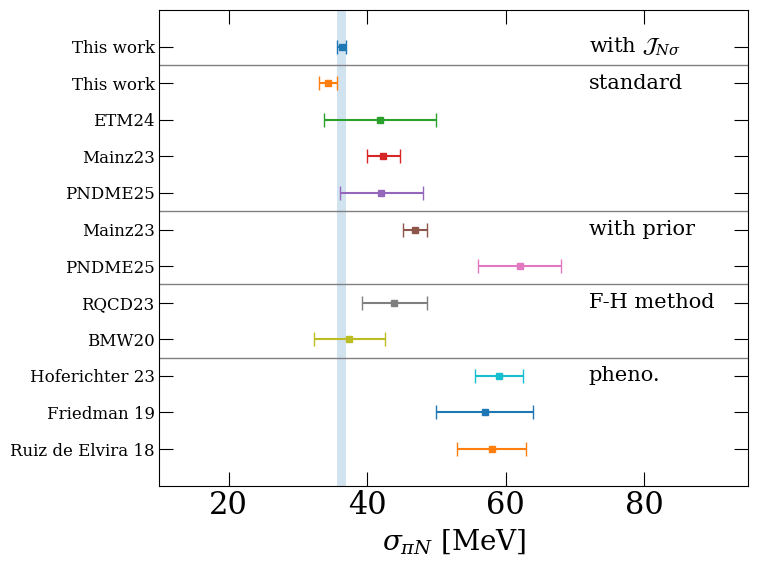

In [2]:
# %load_ext autoreload
# %autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit,fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['errorbar.capsize'] = 12
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# mpl.rcParams.update({"axes.grid" : True})
import util as yu
yu.flag_fast=False


sgms={
    # lattice matrix element
    'this':['This work',(36.3,0.7)],
    
    'this2':['This work',(34.4,1.3)],
    'ETM24':['ETM24',(41.9,8.1)], # Alexandrou:2024ozj
    'ETM19':['ETM19',(41.6,3.8)], # Alexandrou:2019brg B211
    # 'ETM19_A2':['ETM19',()], # A2
    'Mainz23':['Mainz23',(43.7,3.6)], # Agadjanov:2023efe
    'Mainz23_wd':['Mainz23',(42.3,2.4)], # Agadjanov:2023efe
    'Mainz23_prior':['Mainz23',(46.9,1.7)], # Agadjanov:2023efe
    
    'PNDME21':['PNDME21',(41.9,4.9)], # Gupta:2021ahb standard
    'PNDME21_prior':['PNDME21',(59.6,7.4)], # with prior from ChiPT
    
    'PNDME25':['PNDME25',(42,6)], # Gupta:2021ahb standard
    'PNDME25_prior':['PNDME25',(62,6)], # with prior from ChiPT
    
    # lattice FH
    'BMW20':['BMW20',(37.4,5.1,3.0)], # Borsanyi:2020bpd
    'RQCD23':['RQCD23',(43.9,4.7)], # Bali:2023sdi
    
    # phenomenology
    'Hofe23':['Hoferichter 23',(59.0,3.5)], # Hoferichter:2023ptl; scattering length from pionic atom
    'Ruiz18':['Ruiz de Elvira 18',(58,5)], # RuizdeElvira:2017stg; low-energy piN cross section
    'Frie19':['Friedman 19',(57,7)], # Friedman:2019zhc; pionic atom with large Z used
}

fig, axs = yu.getFigAxs(1,1,sharey=True)
ax=axs[0,0]

cases=['this','this2','ETM24','Mainz23_wd','PNDME25','Mainz23_prior','PNDME25_prior','RQCD23','BMW20','Hofe23','Frie19','Ruiz18']

for i,case in enumerate(cases):
    if case is None:
        continue
    label,me=sgms[case]
    ax.errorbar(x=me[0] ,xerr=me[1],y=[-i], capsize=5,markersize=4)

xlim=[10,95]
ax.set_xlim(xlim)
ax.set_xticks([20,40,60,80])
ax.set_xlabel(r'$\sigma_{\pi N}$ [MeV]',fontsize=20)
ylim=[-len(cases),1]
ax.set_ylim(ylim)


ax.yaxis.set_ticks([-i for i in range(len(cases))])
ax.set_yticklabels([sgms[case][0] if case is not None else '' for case in cases],fontsize=12)

mean,err=sgms['this'][1]
ax.fill_betweenx(y=ylim, x1=mean-err, x2=mean+err, alpha=0.2)

ax.text(72,1-1,r'with $\mathcal{J}_{N\sigma}$',fontsize=15,va='center')
for place,text in zip([0,4,6,8],['standard','with prior','F-H method','pheno.']):
    ax.fill_between(x=xlim, y1=-place-0.5-1e-5,y2=-place-0.5+1e-5, color='grey')
    ax.text(72,-place-1,text,fontsize=15,va='center')


plt.tight_layout()
plt.savefig(f'fig/sgmCompare.pdf')
# plt.close()

None

def subtract(me1,me2):
    return (me1[0]-me2[0],np.sqrt(me1[1]**2+me2[1]**2))

t=subtract(sgms['this'][1],sgms['this2'][1])
print(yu.un2str(t[0],t[1]))
t=subtract(sgms['Mainz23_prior'][1],sgms['Mainz23_wd'][1])
print(yu.un2str(t[0],t[1]))
t=subtract(sgms['PNDME21_prior'][1],sgms['PNDME21'][1])
print(yu.un2str(t[0],t[1]))

print()
t=subtract(sgms['Hofe23'][1],sgms['this'][1])
print(yu.un2str(t[0],t[1]),t[0]/t[1])

print()
t_mN=subtract(sgms['this'][1],(-6.5,2.4))
print(yu.un2str(t_mN[0],t_mN[1]))
t=subtract(sgms['Hofe23'][1],t_mN)
print(yu.un2str(t[0],t[1]),t[0]/t[1])

print()
t_mN_iso=subtract(t_mN,(-3.1,0.5))
print(yu.un2str(t_mN_iso[0],t_mN_iso[1]))
t=subtract(sgms['Hofe23'][1],t_mN_iso)
print(yu.un2str(t[0],t[1]),t[0]/t[1])

print()
t_phe2lat=subtract(sgms['Hofe23'][1],(3.1,0.5))
print(yu.un2str(t_phe2lat[0],t_phe2lat[1]))
t=subtract(t_phe2lat,t_mN)
print(yu.un2str(t[0],t[1]),t[0]/t[1])

In [ ]:
import numpy as np
import math

mpiC=139.57
mpi0=134.98

C=5.9*10**(-5) *10**(3*4)
Fpi=92.2
Z=C/(Fpi**4)

t=math.sqrt(mpi0**2+2*4*np.pi*(1/137) * Fpi**2 * Z)
print('mpiC from EM ChPT:',t)


mpiC=139.57
mpi0=134.98

c1=-0.74 * 10**(-3)
t=-4*c1*(mpiC**2-mpi0**2)
print('Delta sgm @ O(p^2):',t)




mpiC from EM ChPT: 139.61675408003384
Delta sgm @ O(p^2): 3.730146120000009
